# SIMULACIÓN | LABORATORIO 5


## Boostrap o remuestreo

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy 
from IPython.display import display, Math
import ipywidgets as widgets
import random
import scipy.stats as stats
import statistics

### Ejercicio 1
En un estudio sobre plantaciones de coihue, se ha recopilado información sobre la altura que alcanzan dichos árboles a los 20 años de edad, en diversas zonas de la región sur austral de Chile. A partir de dichos datos, estamos interesados en calcular un intervalo de confianza para la mediana de altura que alcanza esta especie a los 20 años de edad.
Para ello utilizaremos remuestreo o bootstrap.
1. Analice el código y evalue el número de muestras de bootstrap para alcanzar convergencia de la varianza estimada de la mediana.
2. Calcule el error cuadrático medio de la mediana.
3. Escoja otro estadístico de la muestra y calcule su incerteza con la técnica de boostrap
4. Compare y comente sus resultados.

In [2]:
datos = [12.5,11.4,18.4,10.7,9.5,11.7,15.4,12.3,18.6, 14.7, 10.7,11.6, 10.1, 8.2, 11.4,21.1, 12.1, 7.5, 12.5, 14.7, 10.3, 5.4, 9.4, 13.8, 9.6, 11.3, 14.8, 12.6]
n=len(datos)

In [6]:

m = statistics.median(datos)
print ("Media:" , m)
b=100
mm = 0
mn =[]
for i in range(b):
    dat = np.random.choice(list(datos),size=n,replace=True)
    mn.append(statistics.median(dat))
    
var = statistics.variance(mn)
print("Varianza:" , var)
rango = 1.96*math.sqrt(var)
display("Media +- Varianza:", Math('%0.2f \pm %0.2f' % (m, rango )))

              

Media: 11.649999999999999
Varianza: 0.2822755050505051


'Media +- Varianza:'

<IPython.core.display.Math object>

### 1.1

In [7]:
def convergencia(n,datos):
    b = [10,100,1000,10000,100000]
    mn =[]
    var = []
    for i in range (len(b)):
        for j in range(b[i]):
            dat = np.random.choice(list(datos),size=n,replace=True)
            mn.append(statistics.median(dat))
        var += [statistics.variance(mn)]
    return var

In [8]:
conv=convergencia(11,datos)

In [9]:
conv

[0.7534444444444449,
 0.7180817347789826,
 0.9159542807008995,
 0.9056387575565551,
 0.9107655234560248]

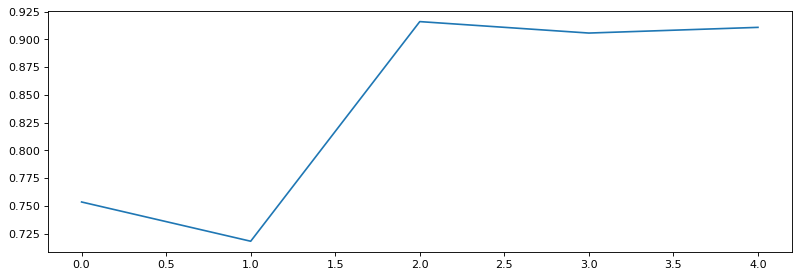

In [10]:
fig, ax = plt.subplots(1, 1,figsize=(12, 4), dpi=80)
ax.plot(conv)

Segun el grafico y los valores de convergencia podemos observar que con 100 muestras podemos llegar a la convergencia de la varianza de la mediana estimada

### 1.2

In [11]:
m = statistics.median(datos)
print (m)
b=100
mm = 0
mse=0
for i in range(b):
    dat = np.random.choice(list(datos),size=n,replace=True)
    mse += (statistics.median(dat)-m)**2

mse= mse/b
print(mse)

11.649999999999999
0.19477500000000014


### 1.3

In [14]:
m = statistics.mean(datos)
print ("Media:" , m)
b=100
mm = 0
mn =[]
for i in range(b):
    dat = np.random.choice(list(datos),size=n,replace=True)
    mn.append(statistics.mean(dat))
var = statistics.variance(mn)
print("Varianza: " , var)
rango = 1.96*math.sqrt(var)
display("Media +- Varianza: ", Math('%0.1f \pm %0.1f' % (m, rango)))

Media: 12.225
Varianza:  0.3482780045351474


'Media +- Varianza: '

<IPython.core.display.Math object>

In [15]:
def convergenciamed(n,datos):
    b = [10,100,1000,10000,100000]
    mn =[]
    var = []
    for i in range (len(b)):
        for j in range(b[i]):
            dat = np.random.choice(list(datos),size=n,replace=True)
            mn.append(statistics.mean(dat))
        var += [statistics.variance(mn)]
    return var

In [16]:
conv2=convergenciamed(11,datos)
conv2

[0.6416198347107441,
 1.191700521784683,
 1.055214037495454,
 1.008600784228152,
 1.0116427876936231]

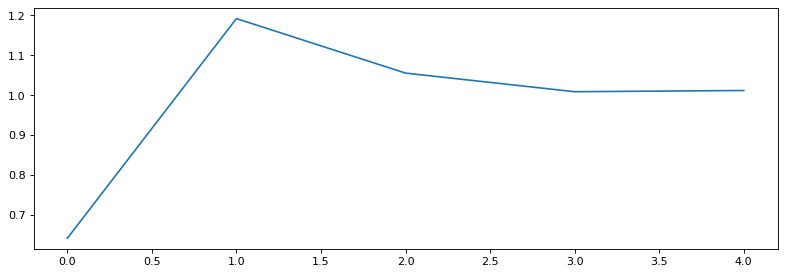

In [17]:
fig, ax = plt.subplots(1, 1,figsize=(12, 4), dpi=80)
ax.plot(conv2)

Al igual que en el caso de la mediana en el caso de la media tenemos que desde los 100 casos llegamos a una convergencia con la media estiamada

### Ejercicio 2

Suponga que los datos previamente registrados provienen de una distribución normal de parámetros $(\mu,\sigma)$

1. Calcule los estimadores máximo verosímil de $\hat{\mu}$ y $\hat{\sigma}$
2. Utilice boostrap paramétrico para estimar la incerteza de $\hat{\mu}$ y $\hat{\sigma}$ . Estime el número de muestras para alcanzar convergencia en cada caso.
3. Compare y comente sus resultados.



In [20]:
from IPython.display import Math
datos = [12.5,11.4,18.4,10.7,9.5,11.7,15.4,12.3,18.6, 14.7, 10.7,11.6, 10.1, 8.2, 11.4,21.1, 12.1, 7.5, 12.5, 14.7, 10.3, 5.4, 9.4, 13.8, 9.6, 11.3, 14.8, 12.6]
n=len(datos)
m = statistics.mean(datos)

In [22]:
mu, sigma = stats.norm.fit(datos)
print("Media: ", mu)
print("Varianza: ", sigma)

Media:  12.225000000000003
Varianza:  3.3405116160766237


In [23]:
mu = statistics.mean(datos)
sigma = statistics.stdev(datos)
print("Media: ", mu)
print("Varianza: ", sigma)

Media:  12.225
Varianza:  3.401810520122309


**R:** Los estimadores de maxima verosimilitud para una distribucion normal son lo mismo que calcular la media y la desviacion estandar.

In [28]:
mu = statistics.mean(datos)
sigma = statistics.stdev(datos)
mu_b = []
sigma_b = []
b = range(1000, 25000, 1000)
var_mu = []
var_sigma= []
for j in b:
    for i in range(j):
        #dat = np.random.choice(list(datos), size=n, replace=True)
        dat = np.random.normal(mu, sigma, n)
        u = statistics.mean(dat)
        o = statistics.stdev(dat)
        mu_b.append(u)
        sigma_b.append(o)
    var_mu.append(statistics.variance(mu_b))
    var_sigma.append(statistics.variance(sigma_b))

<IPython.core.display.Math object>

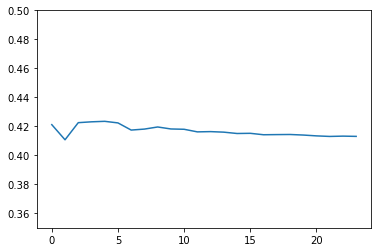

In [31]:
plt.ylim([0.35, .5])
plt.plot(var_mu)
var = var_mu[len(var_mu)-1] 
rango = 1.96*math.sqrt(var)
display(Math('%0.2f \pm %0.2f' % (mu, rango)))

<IPython.core.display.Math object>

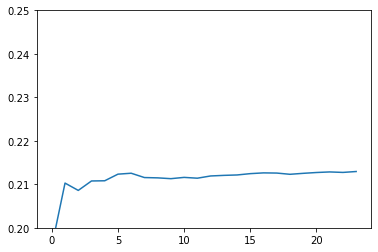

In [32]:
plt.ylim([0.2, .25])
plt.plot(var_sigma)
var = var_sigma[len(var_sigma)-1] 
rango = 1.96*math.sqrt(var)
display(Math('%0.2f \pm %0.2f' % (sigma, rango)))